<a href="https://colab.research.google.com/github/Rtniewi/cwiertniewicz-DataScience/blob/main/HW7/problem1_python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

//*** Katrina Cwiertniewicz
//*** Introduction to Data Science IS1
//***10/11/2025
//*** Project 7: Problem 1 Python
###The purpose of this assignment is to analyze the dermatology dataset using contigency tables, a linear regression model, a NB classifier model, decision tree model, and a random forest model.


In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import figure
from sklearn import linear_model, preprocessing, tree
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.metrics import confusion_matrix, r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, KFold

**Load the Data**

In [76]:
from google.colab import files
uploaded = files.upload()

Saving dermatology_data.csv to dermatology_data (1).csv


In [77]:
dermatology_dataDF  = pd.read_csv("dermatology_data.csv")
dermatology_dataDF

,erythema,scaling,definite_borders,itching,koebner_phenomenon,polygonal_papules,follicular_papules,oral_mucosal_involvement,knee_and_elbow_involvement,scalp_involvement,...,disappearance_of_the_granular_layer,vacuolisation_and_damage_of_basal_layer,spongiosis,saw-tooth_appearance_of_retes,follicular_horn_plug,perifollicular_parakeratosis,inflammatory_monoluclear_inflitrate,band-like_infiltrate,age,class
0,3,3,3,2,1,0,0,0,1,1,...,0,0,0,0,0,0,1,0,8.0,1
1,3,3,2,1,1,0,0,0,2,2,...,0,0,0,0,0,0,1,0,20.0,1
2,3,3,1,2,0,0,0,0,0,1,...,0,0,2,0,0,0,1,0,22.0,2
3,3,3,3,0,0,0,0,0,3,3,...,3,0,0,0,0,0,2,0,38.0,1
4,3,2,2,0,0,0,0,0,0,0,...,0,0,3,0,0,0,2,0,51.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,1,1,1,2,0,0,0,0,0,0,...,0,0,1,0,0,0,2,0,45.0,5
362,0,1,0,3,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,30.0,5
363,0,1,0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,3,0,51.0,5
364,0,0,0,0,0,0,0,3,0,0,...,0,3,3,3,0,0,3,3,52.0,3


**Check for any missing values and impute, if necessary**

Age is the only column that has null values

In [78]:
dermatology_dataDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 35 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   erythema                                  366 non-null    int64  
 1   scaling                                   366 non-null    int64  
 2   definite_borders                          366 non-null    int64  
 3   itching                                   366 non-null    int64  
 4   koebner_phenomenon                        366 non-null    int64  
 5   polygonal_papules                         366 non-null    int64  
 6   follicular_papules                        366 non-null    int64  
 7   oral_mucosal_involvement                  366 non-null    int64  
 8   knee_and_elbow_involvement                366 non-null    int64  
 9   scalp_involvement                         366 non-null    int64  
 10  family_history                        

8 of the Age values are null

In [79]:
# How many missing values are there now?
dermatology_dataDF.age.isnull().sum()

np.int64(8)

I chose to use the median for null values as there seems to be outliers in the data. This will help with centering the data.

In [80]:
print(dermatology_dataDF.age.median())

35.0


In [81]:
imputer = SimpleImputer(missing_values=np.nan, strategy='median')

dermatology_dataDF.age = imputer.fit_transform(dermatology_dataDF['age'].values.reshape(-1,1))[:,0]

print(dermatology_dataDF.age.isnull().sum())

0


**Plot the distribution of disease vs. age in order to understand the relationship between the two.**

[Text(0.5, 1.0, 'Disease and Age'), Text(0, 0.5, 'Age')]

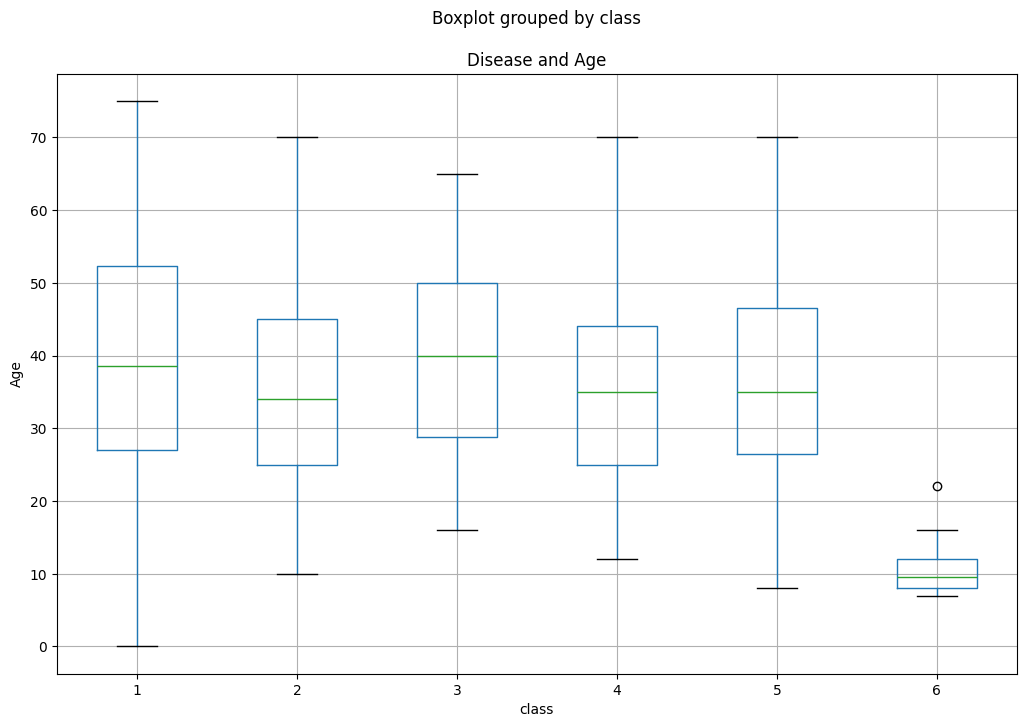

In [82]:
age_class_boxplot = dermatology_dataDF.boxplot(column=['age'], by='class', figsize=(12, 8))
age_class_boxplot.set(title="Disease and Age", ylabel="Age")

**Is age a good indicator of disease? Fully explain your answer.**

For classes 1-5, a median age of about 35-40 can show us the middle of the dataset. The upper and lower quartiles also show consistent values within a ten-point difference between classes. However, major differences of the minimum and maximum show a broader span to the data, which makes age not a good indicator for disease. Especially, when we look at class 6, which has a median age of 10 and an outlier in the 20-year range. Its maximum is also before the other classes, falling before their lower quartile. This class would not be able to be represented the same way as the other classes with their age.


**Use contingency tables to determine which ordinal attributes have the most leverage on disease.**

In [83]:
# Cross tabulation of Erythema and Class (Disease)

p_crosstab = pd.crosstab(dermatology_dataDF.erythema, dermatology_dataDF['class'])

print(p_crosstab)

class      1   2   3   4   5   6
erythema                        
0          1   0   1   0   2   0
1          7   5   7  11  25   2
2         63  34  49  32  22  15
3         41  22  15   6   3   3


In [84]:
# Cross tabulation of Scaling and Class (Disease)

p_crosstab = pd.crosstab(dermatology_dataDF.scaling, dermatology_dataDF['class'])

print(p_crosstab)

class     1   2   3   4   5   6
scaling                        
0         0   0   2   0   6   0
1        13   7  28  24  34   5
2        64  43  37  25  11  15
3        35  11   5   0   1   0


In [85]:
# Cross tabulation of Definite Borders and Class (Disease)

p_crosstab = pd.crosstab(dermatology_dataDF.definite_borders, dermatology_dataDF['class'])

print(p_crosstab)

class              1   2   3   4   5  6
definite_borders                       
0                  0  21   1   9  23  5
1                 14  22  10  22  16  9
2                 73  18  42  18  11  6
3                 25   0  19   0   2  0


In [86]:
# Cross tabulation of Itching and Class (Disease)

p_crosstab = pd.crosstab(dermatology_dataDF.itching, dermatology_dataDF['class'])

print(p_crosstab)

class     1   2   3   4   5   6
itching                        
0        55   9   2  33   8  11
1        22  16   9  10   7   8
2        21  25  28   5  20   1
3        14  11  33   1  17   0


In [87]:
# Cross tabulation of Koebner Phenomenon and Class (Disease)

p_crosstab = pd.crosstab(dermatology_dataDF.koebner_phenomenon, dermatology_dataDF['class'])

print(p_crosstab)

class                1   2   3   4   5   6
koebner_phenomenon                        
0                   63  60  20   9  52  20
1                   27   0  18  25   0   0
2                   18   1  23  12   0   0
3                    4   0  11   3   0   0


In [88]:
# Cross tabulation of Polygonal Papules and Class (Disease)

p_crosstab = pd.crosstab(dermatology_dataDF.polygonal_papules, dermatology_dataDF['class'])

print(p_crosstab)

class                1   2   3   4   5   6
polygonal_papules                         
0                  112  61   3  49  52  20
1                    0   0   1   0   0   0
2                    0   0  41   0   0   0
3                    0   0  27   0   0   0


In [89]:
# Cross tabulation of Follicular Papules and Class (Disease)

p_crosstab = pd.crosstab(dermatology_dataDF.follicular_papules, dermatology_dataDF['class'])

print(p_crosstab)

class                 1   2   3   4   5   6
follicular_papules                         
0                   109  60  72  49  43   0
1                     2   1   0   0   6   2
2                     1   0   0   0   3  12
3                     0   0   0   0   0   6


In [90]:
# Cross tabulation of Oral Mucosal Involvement and Class (Disease)

p_crosstab = pd.crosstab(dermatology_dataDF.oral_mucosal_involvement, dermatology_dataDF['class'])

print(p_crosstab)

class                       1   2   3   4   5   6
oral_mucosal_involvement                         
0                         112  61   5  49  52  20
1                           0   0   9   0   0   0
2                           0   0  45   0   0   0
3                           0   0  13   0   0   0


In [91]:
# Cross tabulation of Knee and Elbow Involvement and Class (Disease)

p_crosstab = pd.crosstab(dermatology_dataDF.knee_and_elbow_involvement, dermatology_dataDF['class'])

print(p_crosstab)

class                        1   2   3   4   5  6
knee_and_elbow_involvement                       
0                           23  57  71  49  50  1
1                           15   4   0   0   2  7
2                           54   0   1   0   0  9
3                           20   0   0   0   0  3


In [92]:
# Cross tabulation of Scalp Involvement and Class (Disease)

p_crosstab = pd.crosstab(dermatology_dataDF.scalp_involvement, dermatology_dataDF['class'])

print(p_crosstab)

class               1   2   3   4   5   6
scalp_involvement                        
0                  23  56  70  49  52  14
1                  23   3   2   0   0   2
2                  50   2   0   0   0   4
3                  16   0   0   0   0   0


In [93]:
# Cross tabulation of Family History and Class (Disease)

p_crosstab = pd.crosstab(dermatology_dataDF.family_history, dermatology_dataDF['class'])

print(p_crosstab)

class            1   2   3   4   5   6
family_history                        
0               80  58  71  49  52  10
1               32   3   1   0   0  10


In [94]:
# Cross tabulation of Melanin Incontinence and Class (Disease)

p_crosstab = pd.crosstab(dermatology_dataDF.melanin_incontinence, dermatology_dataDF['class'])

print(p_crosstab)

class                   1   2   3   4   5   6
melanin_incontinence                         
0                     112  61   2  49  52  20
1                       0   0   8   0   0   0
2                       0   0  46   0   0   0
3                       0   0  16   0   0   0


In [95]:
# Cross tabulation of Eosinophils in the Infiltrate and Class (Disease)

p_crosstab = pd.crosstab(dermatology_dataDF.eosinophils_in_the_infiltrate, dermatology_dataDF['class'])

print(p_crosstab)

class                            1   2   3   4   5   6
eosinophils_in_the_infiltrate                         
0                              109  39  62  46  48  20
1                                2  16   8   3   4   0
2                                1   6   2   0   0   0


In [96]:
# Cross tabulation of PNL Infiltrate and Class (Disease)

p_crosstab = pd.crosstab(dermatology_dataDF.pnl_infiltrate, dermatology_dataDF['class'])

print(p_crosstab)

class            1   2   3   4   5   6
pnl_infiltrate                        
0               34  17  72  43  52  17
1               37  23   0   6   0   3
2               35  20   0   0   0   0
3                6   1   0   0   0   0


In [97]:
# Cross tabulation of Fibrosis of the Papillary Dermis and Class (Disease)

p_crosstab = pd.crosstab(dermatology_dataDF.fibrosis_of_the_papillary_dermis, dermatology_dataDF['class'])

print(p_crosstab)

class                               1   2   3   4   5   6
fibrosis_of_the_papillary_dermis                         
0                                 112  61  70  49   0  20
1                                   0   0   0   0   8   0
2                                   0   0   2   0  21   0
3                                   0   0   0   0  23   0


In [98]:
# Cross tabulation of Exocytosis and Class (Disease)

p_crosstab = pd.crosstab(dermatology_dataDF.exocytosis, dermatology_dataDF['class'])

print(p_crosstab)

class        1   2   3   4   5  6
exocytosis                       
0           93   1   1   1  20  2
1            8   7   6   8  20  8
2           11  32  38  28  12  8
3            0  21  27  12   0  2


In [99]:
# Cross tabulation of Acanthosis and Class (Disease)

p_crosstab = pd.crosstab(dermatology_dataDF.acanthosis, dermatology_dataDF['class'])

print(p_crosstab)

class        1   2   3   4   5   6
acanthosis                        
0            1   4   1   4   0   0
1           14  14   9  19   7   8
2           70  35  43  26  25  11
3           27   8  19   0  20   1


In [100]:
# Cross tabulation of Hyperkeratosis and Class (Disease)

p_crosstab = pd.crosstab(dermatology_dataDF.hyperkeratosis, dermatology_dataDF['class'])

print(p_crosstab)

class            1   2   3   4   5   6
hyperkeratosis                        
0               53  50  54  37  27   6
1               30  10  15   9  14  12
2               25   0   3   3  11   2
3                4   1   0   0   0   0


In [101]:
# Cross tabulation of Parakeratosis and Class (Disease)

p_crosstab = pd.crosstab(dermatology_dataDF.parakeratosis, dermatology_dataDF['class'])

print(p_crosstab)

class           1   2   3   4   5   6
parakeratosis                        
0               1  24  15  17  27   2
1              20  17  32  27  11  11
2              69  17  20   5  14   7
3              22   3   5   0   0   0


In [102]:
# Cross tabulation of Clubbing of the Rete Ridges and Class (Disease)

p_crosstab = pd.crosstab(dermatology_dataDF.clubbing_of_the_rete_ridges, dermatology_dataDF['class'])

print(p_crosstab)

class                         1   2   3   4   5   6
clubbing_of_the_rete_ridges                        
0                             3  61  72  49  49  18
1                            15   0   0   0   2   2
2                            60   0   0   0   1   0
3                            34   0   0   0   0   0


In [103]:
# Cross tabulation of Elongation of the Rete Ridges and Class (Disease)

p_crosstab = pd.crosstab(dermatology_dataDF.elongation_of_the_rete_ridges, dermatology_dataDF['class'])

print(p_crosstab)

class                           1   2   3   4   5   6
elongation_of_the_rete_ridges                        
0                               0  54  72  49   5  18
1                              11   4   0   0   6   2
2                              61   3   0   0  31   0
3                              40   0   0   0  10   0


In [104]:
# Cross tabulation of Thinning of the Suprapapillary Epidermis and Class (Disease)

p_crosstab = pd.crosstab(dermatology_dataDF.thinning_of_the_suprapapillary_epidermis, dermatology_dataDF['class'])

print(p_crosstab)

class                                      1   2   3   4   5   6
thinning_of_the_suprapapillary_epidermis                        
0                                          4  60  72  49  51  20
1                                         17   1   0   0   1   0
2                                         60   0   0   0   0   0
3                                         31   0   0   0   0   0


In [105]:
# Cross tabulation of Spongiform Pustule and Class (Disease)

p_crosstab = pd.crosstab(dermatology_dataDF.spongiform_pustule, dermatology_dataDF['class'])

print(p_crosstab)

class                1   2   3   4   5   6
spongiform_pustule                        
0                   52  53  72  49  51  19
1                   30   6   0   0   1   1
2                   24   2   0   0   0   0
3                    6   0   0   0   0   0


In [106]:
# Cross tabulation of Munro Microabcess and Class (Disease)

p_crosstab = pd.crosstab(dermatology_dataDF.munro_microabcess, dermatology_dataDF['class'])

print(p_crosstab)

class               1   2   3   4   5   6
munro_microabcess                        
0                  34  61  71  48  52  20
1                  36   0   0   1   0   0
2                  33   0   0   0   0   0
3                   9   0   1   0   0   0


In [107]:
# Cross tabulation of Focal Hypergranulosis and Class (Disease)

p_crosstab = pd.crosstab(dermatology_dataDF.focal_hypergranulosis, dermatology_dataDF['class'])

print(p_crosstab)

class                    1   2   3   4   5   6
focal_hypergranulosis                         
0                      112  61   2  49  52  19
1                        0   0  12   0   0   1
2                        0   0  43   0   0   0
3                        0   0  15   0   0   0


In [108]:
# Cross tabulation of Disappearance of the Granular Layer and Class (Disease)

p_crosstab = pd.crosstab(dermatology_dataDF.disappearance_of_the_granular_layer, dermatology_dataDF['class'])

print(p_crosstab)

class                                 1   2   3   4   5   6
disappearance_of_the_granular_layer                        
0                                    46  61  63  31  52  20
1                                    12   0   1  17   0   0
2                                    40   0   8   1   0   0
3                                    14   0   0   0   0   0


In [109]:
# Cross tabulation of Vacuolisation and Damage of Basal Layer and Class (Disease)

p_crosstab = pd.crosstab(dermatology_dataDF.vacuolisation_and_damage_of_basal_layer, dermatology_dataDF['class'])

print(p_crosstab)

class                                      1   2   3   4   5   6
vacuolisation_and_damage_of_basal_layer                         
0                                        111  61   1  49  52  20
1                                          1   0   2   0   0   0
2                                          0   0  43   0   0   0
3                                          0   0  26   0   0   0


In [110]:
# Cross tabulation of Spongiosis and Class (Disease)

p_crosstab = pd.crosstab(dermatology_dataDF.spongiosis, dermatology_dataDF['class'])

print(p_crosstab)

class         1   2   3   4   5  6
spongiosis                        
0           112   4  35   2  40  6
1             0   2   6   7   7  6
2             0  35  20  31   4  6
3             0  20  11   9   1  2


In [111]:
# Cross tabulation of Saw Tooth Appearance of Retes and Class (Disease)

p_crosstab = pd.crosstab(dermatology_dataDF['saw-tooth_appearance_of_retes'], dermatology_dataDF['class'])

print(p_crosstab)

class                            1   2   3   4   5   6
saw-tooth_appearance_of_retes                         
0                              112  61   1  48  52  20
1                                0   0   4   1   0   0
2                                0   0  40   0   0   0
3                                0   0  27   0   0   0


In [112]:
# Cross tabulation of Follicular Horn Plug and Class (Disease)

p_crosstab = pd.crosstab(dermatology_dataDF.follicular_horn_plug, dermatology_dataDF['class'])

print(p_crosstab)

class                   1   2   3   4   5  6
follicular_horn_plug                        
0                     112  60  71  49  51  1
1                       0   1   1   0   1  7
2                       0   0   0   0   0  8
3                       0   0   0   0   0  4


In [113]:
# Cross tabulation of Perifollicular Parakeratosis and Class (Disease)

p_crosstab = pd.crosstab(dermatology_dataDF.perifollicular_parakeratosis, dermatology_dataDF['class'])

print(p_crosstab)

class                           1   2   3   4   5   6
perifollicular_parakeratosis                         
0                             112  60  72  49  52   0
1                               0   1   0   0   0   3
2                               0   0   0   0   0  13
3                               0   0   0   0   0   4


In [114]:
# Cross tabulation of Inflammatory Monoluclear Inflitrate and Class (Disease)

p_crosstab = pd.crosstab(dermatology_dataDF.inflammatory_monoluclear_inflitrate, dermatology_dataDF['class'])

print(p_crosstab)

class                                 1   2   3   4   5   6
inflammatory_monoluclear_inflitrate                        
0                                     5   4   1   1   1   1
1                                    22  23   3  13  17   7
2                                    68  27  45  31  24  11
3                                    17   7  23   4  10   1


In [115]:
# Cross tabulation of Band Like Infiltrate and Class (Disease)

p_crosstab = pd.crosstab(dermatology_dataDF['band-like_infiltrate'], dermatology_dataDF['class'])

print(p_crosstab)

class                   1   2   3   4   5   6
band-like_infiltrate                         
0                     110  60   0  49  51  19
1                       1   0   0   0   1   1
2                       1   1  20   0   0   0
3                       0   0  52   0   0   0


**Plot the obtained results.**

Out of the ordinal attributes, these had the most leverage on disease with higher values for 1-3 and with very little 0's across all classes.

Chosen Ordinal Attributes: Erythema, Scaling, Definite Borders, Acanthosis, Inflammatory Monoluclear Inflitrate

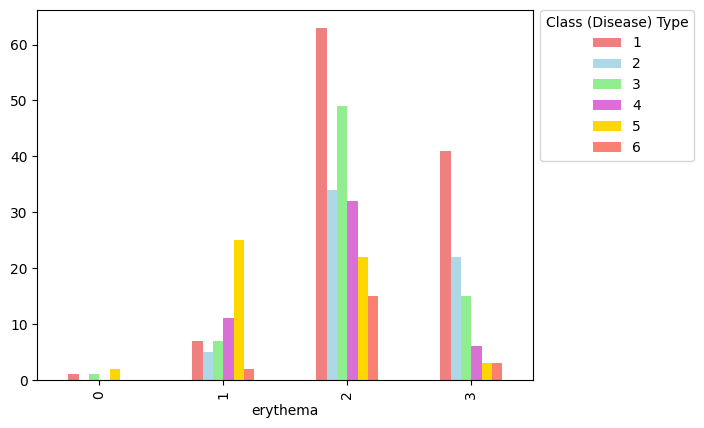

In [116]:
# Chosen Ordinal Attribute: Erythema

attributes_leverage_table = pd.crosstab([dermatology_dataDF.erythema], dermatology_dataDF['class'], margins=False)

ax = attributes_leverage_table.plot(kind="bar", stacked=False, color=['lightcoral','lightblue', 'lightgreen', 'orchid', 'gold', 'salmon'])
ax.legend(title='Class (Disease) Type', bbox_to_anchor=(1, 1.02), loc='upper left')

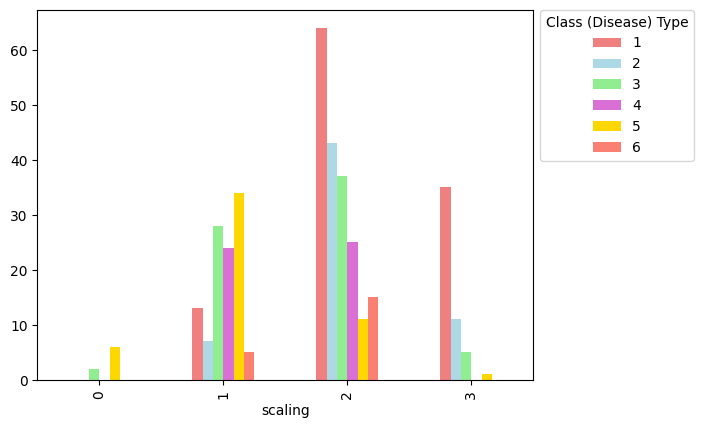

In [117]:
# Chosen Ordinal Attributes: Scaling

attributes_leverage_table = pd.crosstab([dermatology_dataDF.scaling], dermatology_dataDF['class'], margins=False)

ax = attributes_leverage_table.plot(kind="bar", stacked=False, color=['lightcoral','lightblue', 'lightgreen', 'orchid', 'gold', 'salmon'])
ax.legend(title='Class (Disease) Type', bbox_to_anchor=(1, 1.02), loc='upper left')

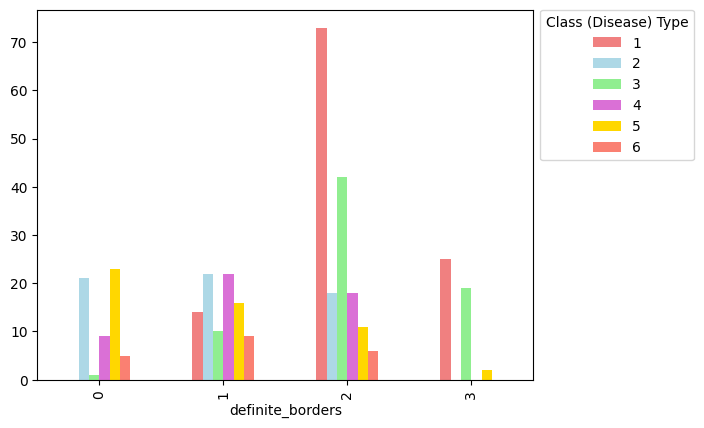

In [118]:
# Chosen Ordinal Attributes: Definite Borders

attributes_leverage_table = pd.crosstab([dermatology_dataDF.definite_borders], dermatology_dataDF['class'], margins=False)

ax = attributes_leverage_table.plot(kind="bar", stacked=False, color=['lightcoral','lightblue', 'lightgreen', 'orchid', 'gold', 'salmon'])
ax.legend(title='Class (Disease) Type', bbox_to_anchor=(1, 1.02), loc='upper left')

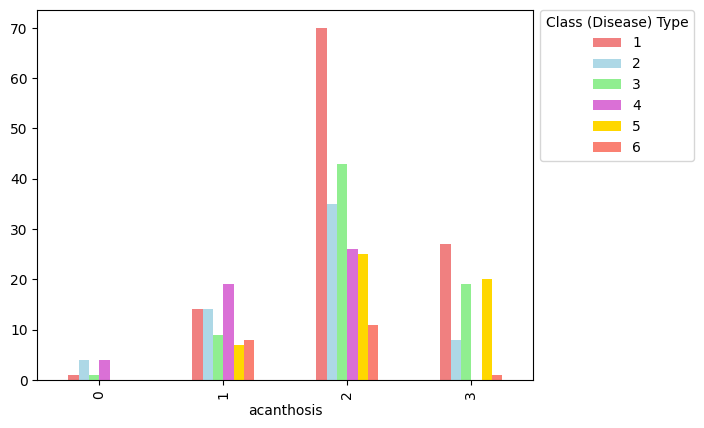

In [119]:
# Chosen Ordinal Attributes: Acanthosis

attributes_leverage_table = pd.crosstab([dermatology_dataDF.acanthosis], dermatology_dataDF['class'], margins=False)

ax = attributes_leverage_table.plot(kind="bar", stacked=False, color=['lightcoral','lightblue', 'lightgreen', 'orchid', 'gold', 'salmon'])
ax.legend(title='Class (Disease) Type', bbox_to_anchor=(1, 1.02), loc='upper left')

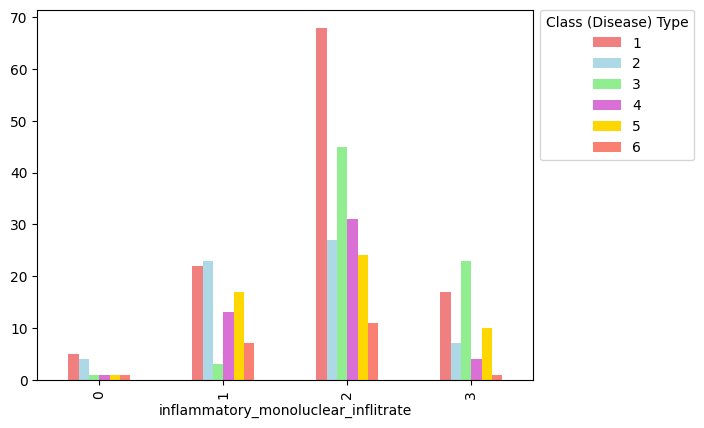

In [120]:
# Chosen Ordinal Attributes: Inflammatory Monoluclear Inflitrate

attributes_leverage_table = pd.crosstab([dermatology_dataDF.inflammatory_monoluclear_inflitrate], dermatology_dataDF['class'], margins=False)

ax = attributes_leverage_table.plot(kind="bar", stacked=False, color=['lightcoral','lightblue', 'lightgreen', 'orchid', 'gold', 'salmon'])
ax.legend(title='Class (Disease) Type', bbox_to_anchor=(1, 1.02), loc='upper left')

**Create a new column disease_1 by extracting only those records where the Disease=1 (psoriasis) , assigning “1” for those rows in the newly created  column, and marking “0” for the rest.**


In [121]:
dermatology_dataDF['disease_1'] = np.where(dermatology_dataDF['class']== 1, 1, 0)

In [122]:
dermatology_dataDF.disease_1.head(6)

,disease_1
0,1
1,1
2,0
3,1
4,0
5,0


**Create four models and evaluate each using 3-fold cross-validation:**

**A linear regression model for disease_1 vs. age even though disease_1 is a categoric variable. Plot the regression line, and compute the MSE and r-squared values for the model.**

In [123]:
# Linear Regression Model
lm1 = linear_model.LinearRegression()

# reshape arrays
x = dermatology_dataDF['age'].values.reshape(-1,1)
y = dermatology_dataDF['disease_1']

# Fit the model using .fit() method
lm1.fit(x, y)

# intercept and slope values
print("Intercept :", lm1.intercept_)
print('Slope :', lm1.coef_)

# Train and Test Split
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.7, test_size = 0.3, random_state = 100)

Intercept : 0.1572185157360713
Slope : [0.00410261]


In [124]:
# Predicitons on the dataset
y_test_pred = lm1.predict(x_test)

cv = KFold(n_splits=3, random_state=1, shuffle=True)

# 3-Fold Cross Validation
validation_data = cross_val_score(lm1, X, y, cv=cv)
print("3-Fold Cross Validation:", validation_data)

print('R2 score:',            r2_score(y_test, y_test_pred))
print('Mean squared error:', mean_squared_error(y_test, y_test_pred))

3-Fold Cross Validation: [-0.00663999 -0.01742097  0.02976505]
R2 score: 0.06868600699280014
Mean squared error: 0.19211237409470835


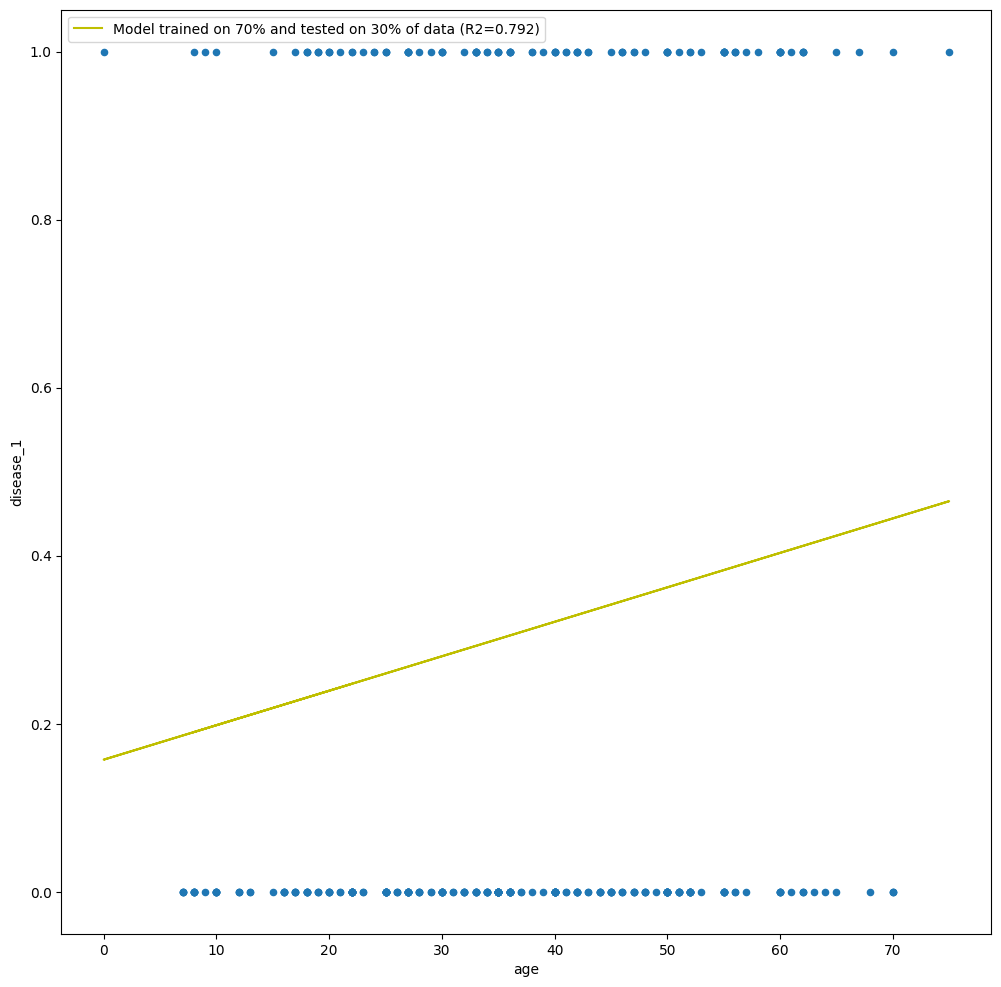

In [125]:
# plot the best fit linear models
dermatology_dataDF.plot(kind='scatter', x='age', y='disease_1', figsize=(12, 12))

plt.plot(x, lm1.intercept_ + lm1.coef_*x, "y", label="Model trained on 70% and tested on 30% of data (R2=0.07")

plt.legend(loc="upper left")
plt.show()


**An NB classifier model for disease_1 vs. the top ranking (relevant) 5 attributes. Display the overall accuracy and the confusion matrix.**





Chosen Ordinal Attributes: Erythema, Scaling, Definite Borders, Acanthosis, Inflammatory Monoluclear Inflitrate

In [126]:
NBmodel = GaussianNB()

# Prepare input and output for learning
X = dermatology_dataDF.iloc[:,[0,1,2,16,31]]
y = dermatology_dataDF.iloc[:,35]

# Train and Test Split
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, random_state=42, shuffle=True, test_size=0.35, stratify=y)

# Display the sets
print("X_train:", X_train)
print("X_test:", X_test)

X_train:      erythema  scaling  definite_borders  acanthosis  \
351         1        1                 0           3   
320         1        1                 2           1   
245         2        2                 2           2   
138         2        1                 1           2   
235         2        2                 1           1   
..        ...      ...               ...         ...   
232         2        2                 2           2   
27          3        2                 2           3   
359         1        1                 0           2   
166         2        1                 1           0   
210         2        1                 3           2   

     inflammatory_monoluclear_inflitrate  
351                                    3  
320                                    1  
245                                    2  
138                                    3  
235                                    2  
..                                   ...  
232              

3-Fold Cross Validation: [0.69672131 0.72131148 0.73770492]


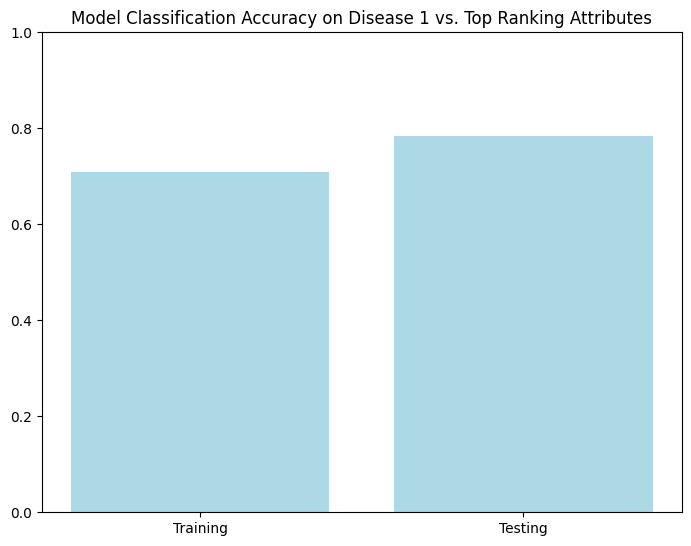

In [127]:
# Train the model
NBmodel.fit(X_train, y_train, )

# Calculate model accuracy on both Training and Testing
labels = ["Training", "Testing"]
scores = [NBmodel.score(X_train, y_train), NBmodel.score(X_test, y_test)]

cv = KFold(n_splits=3, random_state=1, shuffle=True)

# 3-Fold Cross Validation
validation_data = cross_val_score(NBmodel, X, y, cv=cv)
print("3-Fold Cross Validation:", validation_data)

# Plot the accuracy values
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_title('Model Classification Accuracy on Disease 1 vs. Top Ranking Attributes')
ax.bar(labels, scores, color="lightblue")
ax.set_ylim(0, 1)
plt.show()

In [128]:
# Confusion Matrix of Disease 1 and Top Ranking Attributes

disease_model_predictions = NBmodel.predict(X_test)


# Compute TP, TN, FP, FN values for CART
disease_cm = confusion_matrix(y_true=y_test,
                           y_pred = disease_model_predictions)

# Print Disease and Top Rnaking Attributes confusion matrix
print(disease_cm)

print("-----------")

[[68 22]
 [ 6 33]]
-----------


**A decision tree model (Gini or Entropy) for the entire feature space vs. the disease column. Display the relevant information about the generated tree, and print the confusion matrix.**

3-Fold Cross Validation: [0.93442623 0.93442623 0.94262295]

|--- thinning_of_the_suprapapillary_epidermis <= 0.50
|   |--- vacuolisation_and_damage_of_basal_layer <= 0.50
|   |   |--- fibrosis_of_the_papillary_dermis <= 0.50
|   |   |   |--- koebner_phenomenon <= 0.50
|   |   |   |   |--- follicular_papules <= 1.50
|   |   |   |   |   |--- class: 2
|   |   |   |   |--- follicular_papules >  1.50
|   |   |   |   |   |--- class: 6
|   |   |   |--- koebner_phenomenon >  0.50
|   |   |   |   |--- class: 4
|   |   |--- fibrosis_of_the_papillary_dermis >  0.50
|   |   |   |--- class: 5
|   |--- vacuolisation_and_damage_of_basal_layer >  0.50
|   |   |--- class: 3
|--- thinning_of_the_suprapapillary_epidermis >  0.50
|   |--- class: 1



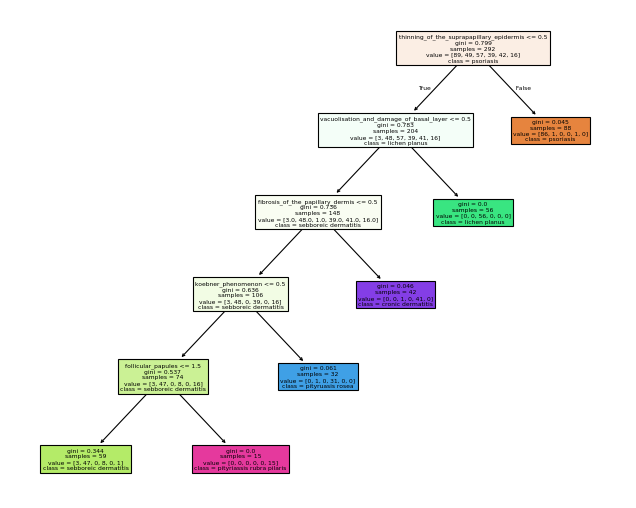

In [134]:
X = dermatology_dataDF.drop(['class', 'disease_1'], axis=1)
y = dermatology_dataDF['class']

# Let's do an 80-20 split
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, random_state=42, shuffle=True, train_size=0.80, stratify=y)


# Decision Tree Model (Gini)
cart_classifier = DecisionTreeClassifier(criterion = "gini", max_leaf_nodes=6, random_state = 120).fit(X_train, y_train)

# Control the figure size
figure(figsize=(10, 8), dpi=80)

cv = KFold(n_splits=3, random_state=1, shuffle=True)

# 3-Fold Cross Validation
validation_data = cross_val_score(cart_classifier, X, y, cv=cv)
print("3-Fold Cross Validation:", validation_data)
print("")

# Plot the tree
tree.plot_tree(cart_classifier, feature_names=X.columns.values.tolist(),
                                class_names=['psoriasis', 'sebboreic dermatitis', 'lichen planus', 'pityruasis rosea', 'cronic dermatitis', 'pityriassis rubra pilaris'],
                                filled = True)


# Print the text version of the tree
text_representation = tree.export_text(cart_classifier,
                                       feature_names=X.columns.values.tolist())
print(text_representation)

In [135]:
# Confusion Matrix of the Entire Feature Space and Disease

disease_feature_predictions = cart_classifier.predict(X_test)


# Compute TP, TN, FP, FN values for CART
cart_cm = confusion_matrix(y_true=y_test,
                           y_pred = disease_feature_predictions)

# Print Disease and Top Rnaking Attributes confusion matrix
print(cart_cm)

print("-----------")

[[22  1  0  0  0  0]
 [ 0 12  0  0  0  0]
 [ 0  0 15  0  0  0]
 [ 0  1  0  9  0  0]
 [ 0  0  0  0 10  0]
 [ 0  1  0  0  0  3]]
-----------


**A random forest model for the entire feature space vs. the disease column. Display the relevant information about one of the generated trees, and print the confusion matrix.**

In [131]:
# Entire Feature Space and Disease Column
X = dermatology_dataDF.drop(['class', 'disease_1'], axis=1)
y = dermatology_dataDF['class']

# Splitting the Training and Test Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Scaling the values
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Random Forest Classifier
classifier = RandomForestClassifier(n_estimators=100, random_state=42)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

cv = KFold(n_splits=3, random_state=1, shuffle=True)

# 3-Fold Cross Validation
validation_data = cross_val_score(classifier, X, y, cv=cv)
print("3-Fold Cross Validation:", validation_data)

#[0,1,2,16,31]]
# Plot the tree
plt.figure(figsize=(100, 100))
random_forest_tree = tree.plot_tree(classifier.estimators_[31],
          feature_names = X.columns,
          class_names=['psoriasis', 'sebboreic dermatitis', 'lichen planus', 'pityruasis rosea', 'cronic dermatitis', 'pityriassis rubra pilaris'],
          filled=True)
plt.show()

3-Fold Cross Validation: [0.98360656 0.97540984 0.96721311]


**Plot the model's .feature_importances_ which is a measure of the accumulation of the impurity decrease within each tree.**

[0.0078832  0.02059976 0.01138126 0.01997669 0.06567003 0.03793302
 0.01659907 0.02977684 0.03320491 0.02155128 0.0034495  0.02735219
 0.00683036 0.03717207 0.07739032 0.03470288 0.00827745 0.00900582
 0.01059392 0.08013266 0.07714652 0.0717911  0.00390735 0.01826121
 0.02865141 0.02384685 0.04451226 0.04790096 0.03439319 0.0185409
 0.01750001 0.00592037 0.02568328 0.02246135]


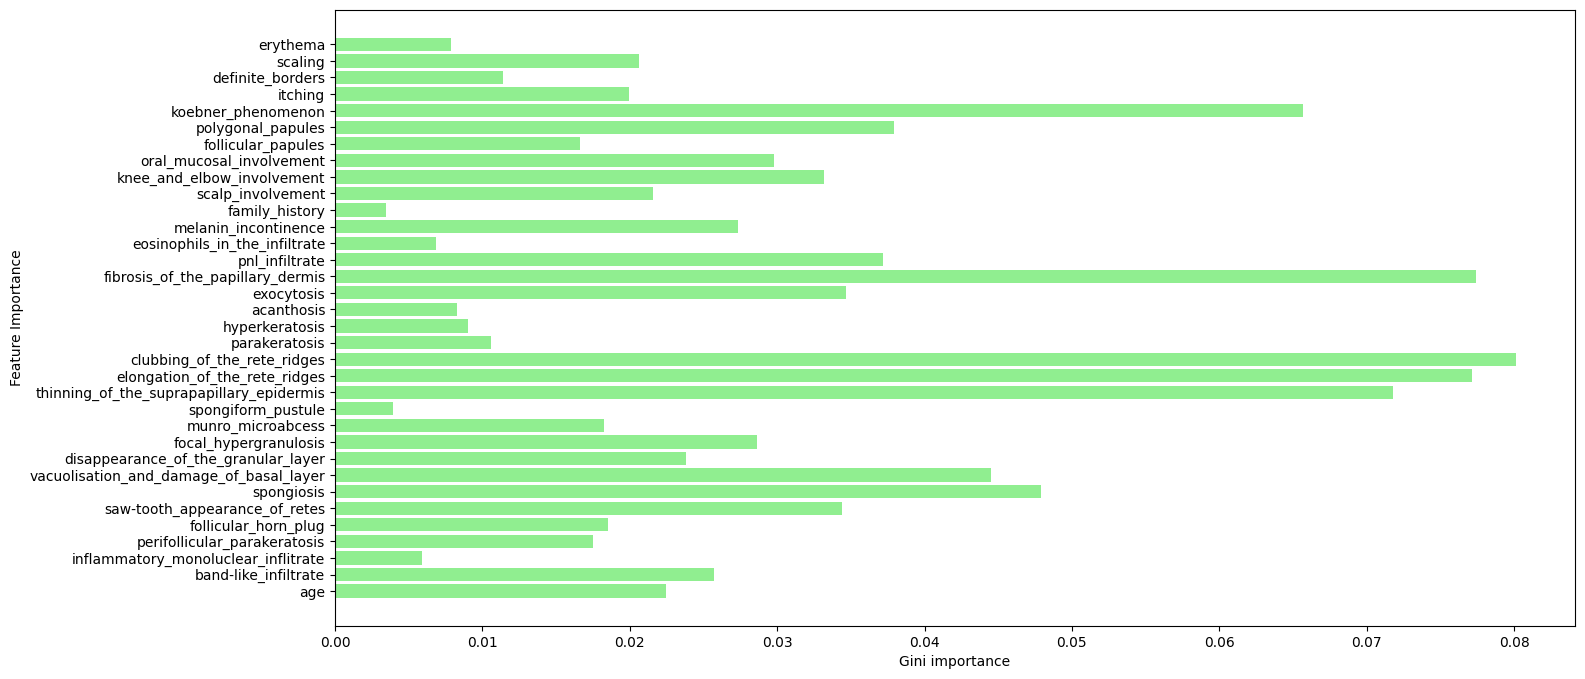

In [132]:
print(classifier.feature_importances_)

plt.figure(figsize=(16,8))
plt.barh(X.columns, classifier.feature_importances_, color='lightgreen')
plt.xlabel("Gini importance")
plt.ylabel("Feature Importance")
plt.gca().invert_yaxis()
plt.show()

In [133]:
# Confusion Matrix of the Entire Feature Space and Disease

disease_feature_predictions = classifier.predict(X_test)


# Compute TP, TN, FP, FN values for CART
cart_cm = confusion_matrix(y_true=y_test,
                           y_pred = disease_feature_predictions)

# Print Disease and Top Rnaking Attributes confusion matrix
print(cart_cm)

print("-----------")

[[23  0  0  0  0  0]
 [ 0 12  0  0  0  0]
 [ 0  0 15  0  0  0]
 [ 0  1  0  9  0  0]
 [ 0  0  0  0 10  0]
 [ 1  0  0  0  0  3]]
-----------


**Carefully compare the models and summarize your findings.**

## Linear Regression Model
This model does not accurately represent the data due to disease_1 being a categorical variable. The MSE error of 19% is not too high, most likely because the age for most diseases typically remains around 40, making it easier to predict disease and age. However, R2 is very low, indicating that age is not a predictor of disease. Although there may be some ages where disease is more common in the plot, it still doesn't represent those values well.

## Naive Bayes Classifier Model
The overall accuracy of training is 75% and testing is 80%. It is not as common to see a higher testing set accuracy. Training is often higher because testing data is data it hasn't seen before, resulting in lower accuracy.

This model's confusion matrix shows that the majority of predictions are true positives. Its true and false negatives are split almost evenly. This represents a model that is better at correctly identifying it as positive over negative.


## Decision Tree (Gini)
This model chose predictors that were able to represent clear splits. The predictors that were used were Thinning of the Suprapapillary Epidermis, Vacuolization and Damage of Basal Layer, Fibrosis of the Papillary Dermis, and the Koebner Phenomenon. Each predictor was split at .50 or 1.50, and determined by a different predictor to find each class.

The confusion matrix was accurate in identifying what disease it was based on the factors. Class 2 was the only class that was misidentified. This could be because a predictor overlaps with another disease, and when tested, it could fall into either of these classes, leading to miscalculations. This could be fixed by expanding the model further for improved classification.

## Random Forest Model
The random forest model splits up the data using more predictors than the previous Decision Tree.

For the feature importance of this model, there are multiple features that contribute significantly to reducing impurtiy reduction. These features are (in order of increasing importance): Koebner Phenomenon, Thinning of the Suprapapillary Epidermis, Elongation of the Rete Ridges, Fibrosis of the Papillary Dermis, and Clubbing of the Rete Ridges. Clubbing of the Rete Ridges has an 80% Gini importance, which should be a good predictor of different classes. From the previous discussion of the importance of age on disease, age is very low at 20% Gini importance. This contributes very little to splitting data. Family History is one of the lowest at 5% Gini importance. If used to split data, we would not see clear tree splits to help determine classes.

Its confusion matrix is a slight improvement from the previous Decision Tree. This model only has two miscalculations compared to 3. This isn't a major difference; however, using more predictor variables, like Random Forest does, could help create a more accurate model.


## Model Comparison
Each model was evaluated using a 3-Fold Cross Validation. These do not represent the order of using these models, as Linear Regression and the Naive Bayes Model use different predictors than the Decision Tree and Random Forest.  In order of average accuracy, Linear Regression(0) NBmodel(72), Decision Tree(93), Random Forest(98).

The Linear Regression Model does not represent the data well at all. This results in negative Validation values.

The Naive Bayes Model predicts some values well. It's most likely a lower accuracy because it is limited to 5 predictors chosen from the data.

Decision Tree and Random Forest represent the data well. Each can classify diseases accurately with only a few errors. Random Forest is the most accurate model due to its use of multiple decision trees; it can assess the data to avoid overfitting.